# Fillna = 0

todo:
- Adjust pipeline to support multilabel.
- save plots during train
- add depth param

In [16]:
import pandas as pd
data = pd.read_csv('./data/combined_data/metadata_only_existant_readings_09042023.csv',index_col=0)
print(data.columns)
data.describe()

,reading,one_year_until_death,CVA,first_AF_in_home_ECG,first_AF_in_Dispatch,AF,IHD,sp_MI_all,sp_CABG,CHF,sp_CPR,cpr_shl,DM2,AF2,DM,assumed_dead,Patient ID,Age_at_start,days_until_approximate_death,age_days
count,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,371307.000000,3.713070e+05,370946.000000,149572.000000,364234.000000
mean,309973.984369,0.028922,0.069746,0.308806,0.284619,0.250914,0.491203,0.324155,0.159604,0.092799,0.022787,0.003779,0.154767,0.250914,0.154767,0.413286,2.933941e+07,63.176282,2414.448292,26323.830268
std,152376.278384,0.167588,0.254718,0.462002,0.451233,0.433540,0.499923,0.468059,0.366239,0.290151,0.149224,0.061354,0.361683,0.433540,0.361683,0.492424,5.498871e+07,11.583146,1597.965545,4194.296275
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.213800e+04,-193.000000,-7227.000000,3146.000000
25%,211431.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.787900e+06,55.000000,1166.000000,23583.000000
50%,323882.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.505430e+06,64.000000,2205.000000,26834.000000
75%,437371.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.799318e+07,71.000000,3473.000000,29450.000000
max,561330.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.315185e+09,113.000000,8265.000000,43298.000000


In [1]:
import os
import re
import yaml

# import trainer
os.chdir('/home/david/Desktop/projects/thesis/downstream_classification')
from executors.train_on_local_machine_v2 import trainer

Starting Experiment


training using device: cuda


The model has 93,542,411 trainable parameters
DownstreamInceptionResnet(
  (layers): ModuleDict(
    (input): DownstreamInceptionResnetBlock(
      (conv1): ConvBlock(
        (conv): Conv1d(12, 64, kernel_size=(7,), stride=(2,), padding=(3,))
        (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (conv2): ConvBlock(
        (conv): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
        (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (inception3a): InceptionBlock(
        (branch1): ConvBlock(
          (conv): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
          (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (branch2): Sequential(
          (0): ConvBlock(
         

Within epoch loss (validation) 0.6883: 100%|██████████| 416/416 [00:38<00:00, 10.81it/s] 


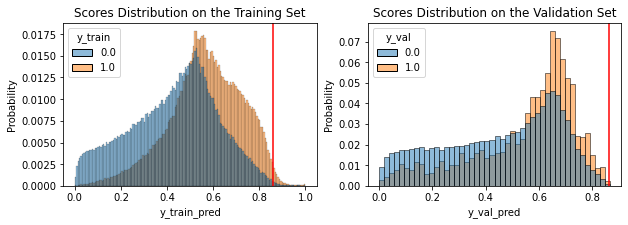

New best val_rocauc loss was found, current best val_recall_for_precision is 0.00072
---------------------------------------------
Epoch: 01 | Time: 9m 34s
	 Train Loss: 0.621
	 Val. Loss: 0.688
	 ROC-AUC: 0.634
	 PR-AUC: 0.041
	 Recall for 0.4 precision: 0.001
	 Best Val. Loss: 0.688
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.041
	 Best Recall for 0.4 precision: 0.001
---------------------------------------------


Within epoch loss (validation) 0.61817: 100%|██████████| 416/416 [01:01<00:00,  6.76it/s]


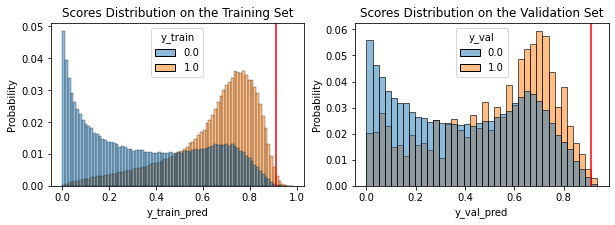

New best val_rocauc loss was found, current best val_recall_for_precision is 0.00287
---------------------------------------------
Epoch: 02 | Time: 9m 48s
	 Train Loss: 0.524
	 Val. Loss: 0.618
	 ROC-AUC: 0.633
	 PR-AUC: 0.041
	 Recall for 0.4 precision: 0.003
	 Best Val. Loss: 0.618
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.041
	 Best Recall for 0.4 precision: 0.003
---------------------------------------------


Within epoch loss (validation) 0.53767: 100%|██████████| 416/416 [00:26<00:00, 15.50it/s]


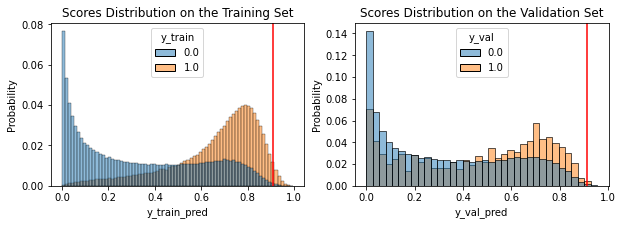

New best val_rocauc loss was found, current best val_recall_for_precision is 0.00359
---------------------------------------------
Epoch: 03 | Time: 10m 17s
	 Train Loss: 0.502
	 Val. Loss: 0.538
	 ROC-AUC: 0.632
	 PR-AUC: 0.042
	 Recall for 0.4 precision: 0.004
	 Best Val. Loss: 0.538
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.042
	 Best Recall for 0.4 precision: 0.004
---------------------------------------------


Within epoch loss (validation) 0.26812: 100%|██████████| 416/416 [00:16<00:00, 24.93it/s]


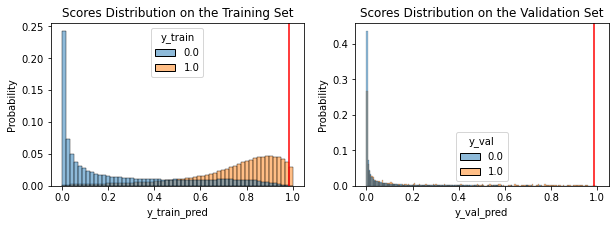

---------------------------------------------
Epoch: 04 | Time: 8m 55s
	 Train Loss: 0.402
	 Val. Loss: 0.268
	 ROC-AUC: 0.623
	 PR-AUC: 0.040
	 Recall for 0.4 precision: 0.002
	 Best Val. Loss: 0.268
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.042
	 Best Recall for 0.4 precision: 0.004
---------------------------------------------


Within epoch loss (validation) 0.38517: 100%|██████████| 416/416 [00:53<00:00,  7.80it/s]


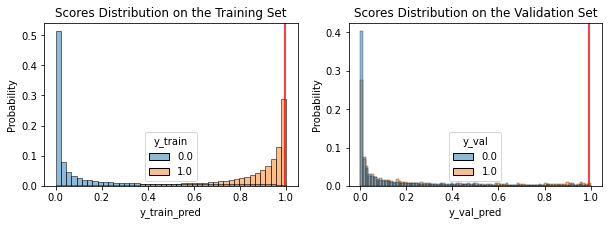

New best val_rocauc loss was found, current best val_recall_for_precision is 0.00646
---------------------------------------------
Epoch: 05 | Time: 9m 5s
	 Train Loss: 0.245
	 Val. Loss: 0.385
	 ROC-AUC: 0.592
	 PR-AUC: 0.037
	 Recall for 0.4 precision: 0.006
	 Best Val. Loss: 0.268
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.042
	 Best Recall for 0.4 precision: 0.006
---------------------------------------------


Within epoch loss (validation) 0.48933: 100%|██████████| 416/416 [00:48<00:00,  8.56it/s]


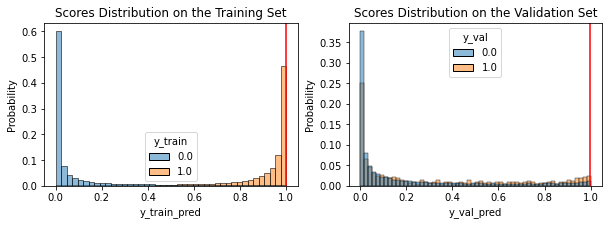

---------------------------------------------
Epoch: 06 | Time: 10m 47s
	 Train Loss: 0.189
	 Val. Loss: 0.489
	 ROC-AUC: 0.605
	 PR-AUC: 0.038
	 Recall for 0.4 precision: 0.003
	 Best Val. Loss: 0.268
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.042
	 Best Recall for 0.4 precision: 0.006
---------------------------------------------


Within epoch loss (validation) 0.40076: 100%|██████████| 416/416 [01:02<00:00,  6.64it/s]


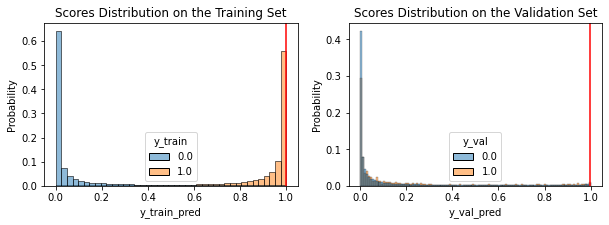

---------------------------------------------
Epoch: 07 | Time: 12m 20s
	 Train Loss: 0.163
	 Val. Loss: 0.401
	 ROC-AUC: 0.590
	 PR-AUC: 0.035
	 Recall for 0.4 precision: 0.005
	 Best Val. Loss: 0.268
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.042
	 Best Recall for 0.4 precision: 0.006
---------------------------------------------


Within epoch loss (validation) 0.50864: 100%|██████████| 416/416 [01:18<00:00,  5.27it/s]


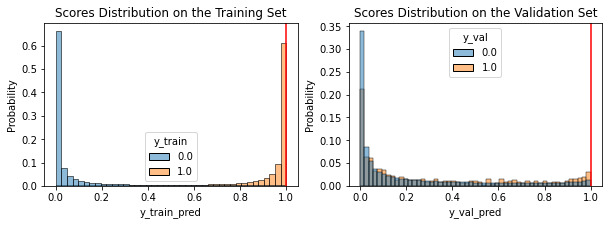

---------------------------------------------
Epoch: 08 | Time: 12m 20s
	 Train Loss: 0.147
	 Val. Loss: 0.509
	 ROC-AUC: 0.597
	 PR-AUC: 0.038
	 Recall for 0.4 precision: 0.001
	 Best Val. Loss: 0.268
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.042
	 Best Recall for 0.4 precision: 0.006
---------------------------------------------


Within epoch loss (validation) 0.21271: 100%|██████████| 416/416 [01:02<00:00,  6.66it/s]


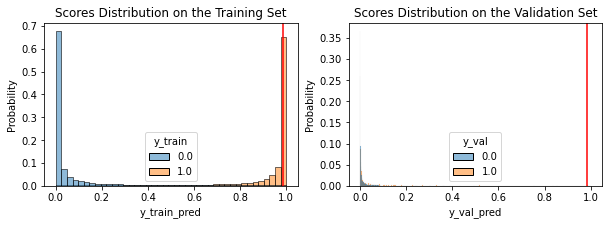

---------------------------------------------
Epoch: 09 | Time: 12m 4s
	 Train Loss: 0.136
	 Val. Loss: 0.213
	 ROC-AUC: 0.585
	 PR-AUC: 0.034
	 Recall for 0.4 precision: 0.004
	 Best Val. Loss: 0.213
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.042
	 Best Recall for 0.4 precision: 0.006
---------------------------------------------


Within epoch loss (validation) 0.87283: 100%|██████████| 416/416 [01:16<00:00,  5.42it/s]


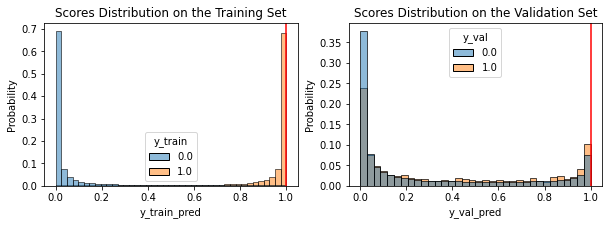

---------------------------------------------
Epoch: 10 | Time: 12m 44s
	 Train Loss: 0.128
	 Val. Loss: 0.873
	 ROC-AUC: 0.588
	 PR-AUC: 0.034
	 Recall for 0.4 precision: 0.001
	 Best Val. Loss: 0.213
	 Best ROC-AUC: 0.634
	 Best PR-AUC: 0.042
	 Best Recall for 0.4 precision: 0.006
---------------------------------------------


(0.04227495026242337, 0)

In [9]:
config = {
    
    # general
    'seed': 123,
    'metadata_file_path': './data/combined_data/metadata_balanced_by_death.csv',
    'data_folder_path': './data/individual-signals/',
    
    # training
    'batch_size': 128,
    'n_epochs': 10,
    'weight_decay': 0.7,
    'lr': 0.0005,
    'eval_metric':'recall_for_precision',

    # architecture
    'targets': ['one_year_until_death'],
    'dropout': 0.1,
    'clip': 1,
    'scale':1,
    'depth': 3,
    
    # misc
    'model_saving_path': './models/inception-v0-death-d3',
    'verbosity':True
}

# run
print('Starting Experiment')
trainer(**config)

In [ ]:
import sys
sys.exit(0)

Starting Experiment


training using device: cuda


The model has 93,542,411 trainable parameters
DownstreamInceptionResnet(
  (layers): ModuleDict(
    (input): DownstreamInceptionResnetBlock(
      (conv1): ConvBlock(
        (conv): Conv1d(12, 64, kernel_size=(7,), stride=(2,), padding=(3,))
        (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (conv2): ConvBlock(
        (conv): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
        (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (inception3a): InceptionBlock(
        (branch1): ConvBlock(
          (conv): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
          (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (branch2): Sequential(
          (0): ConvBlock(
         

Within epoch loss (validation) 0.55362: 100%|██████████| 416/416 [00:19<00:00, 21.42it/s]


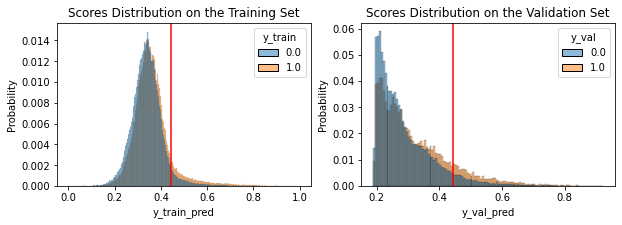

New best val_rocauc loss was found, current best val_recall_for_precision is 0.13222
---------------------------------------------
Epoch: 01 | Time: 10m 7s
	 Train Loss: 0.637
	 Val. Loss: 0.554
	 ROC-AUC: 0.587
	 PR-AUC: 0.317
	 Recall for 0.4 precision: 0.132
	 Best Val. Loss: 0.554
	 Best ROC-AUC: 0.587
	 Best PR-AUC: 0.317
	 Best Recall for 0.4 precision: 0.132
---------------------------------------------


Within epoch loss (validation) 0.55564: 100%|██████████| 416/416 [00:22<00:00, 18.20it/s]


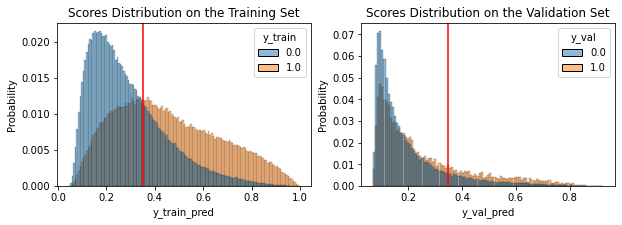

New best val_rocauc loss was found, current best val_recall_for_precision is 0.23583
---------------------------------------------
Epoch: 02 | Time: 9m 21s
	 Train Loss: 0.559
	 Val. Loss: 0.556
	 ROC-AUC: 0.617
	 PR-AUC: 0.347
	 Recall for 0.4 precision: 0.236
	 Best Val. Loss: 0.554
	 Best ROC-AUC: 0.617
	 Best PR-AUC: 0.347
	 Best Recall for 0.4 precision: 0.236
---------------------------------------------


Within epoch loss (validation) 0.57116: 100%|██████████| 416/416 [00:28<00:00, 14.59it/s]


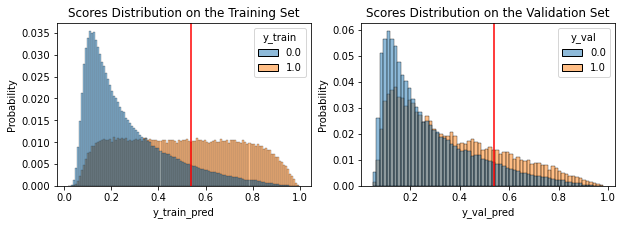

---------------------------------------------
Epoch: 03 | Time: 9m 7s
	 Train Loss: 0.523
	 Val. Loss: 0.571
	 ROC-AUC: 0.623
	 PR-AUC: 0.347
	 Recall for 0.4 precision: 0.219
	 Best Val. Loss: 0.554
	 Best ROC-AUC: 0.623
	 Best PR-AUC: 0.347
	 Best Recall for 0.4 precision: 0.236
---------------------------------------------


Within epoch loss (validation) 0.58163: 100%|██████████| 416/416 [00:26<00:00, 15.48it/s]


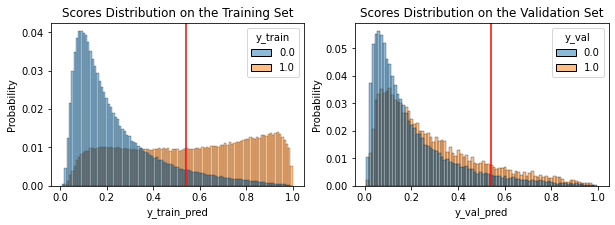

---------------------------------------------
Epoch: 04 | Time: 9m 9s
	 Train Loss: 0.478
	 Val. Loss: 0.582
	 ROC-AUC: 0.629
	 PR-AUC: 0.337
	 Recall for 0.4 precision: 0.137
	 Best Val. Loss: 0.554
	 Best ROC-AUC: 0.629
	 Best PR-AUC: 0.347
	 Best Recall for 0.4 precision: 0.236
---------------------------------------------


Within epoch loss (validation) 0.66313: 100%|██████████| 416/416 [00:40<00:00, 10.25it/s]


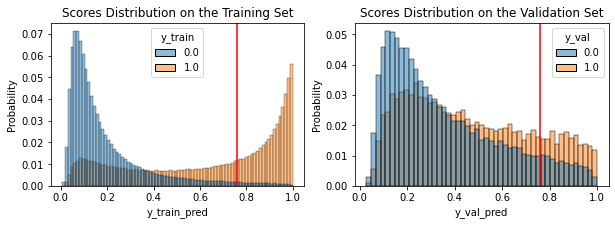

---------------------------------------------
Epoch: 05 | Time: 9m 44s
	 Train Loss: 0.403
	 Val. Loss: 0.663
	 ROC-AUC: 0.628
	 PR-AUC: 0.343
	 Recall for 0.4 precision: 0.184
	 Best Val. Loss: 0.554
	 Best ROC-AUC: 0.629
	 Best PR-AUC: 0.347
	 Best Recall for 0.4 precision: 0.236
---------------------------------------------


Within epoch loss (validation) 0.60746: 100%|██████████| 416/416 [00:35<00:00, 11.65it/s]


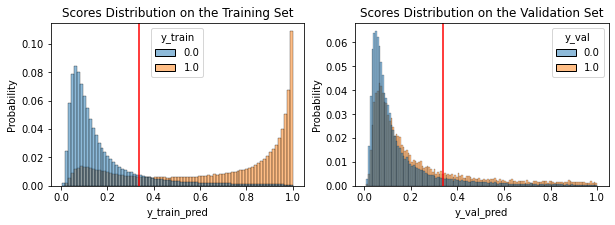

---------------------------------------------
Epoch: 06 | Time: 8m 54s
	 Train Loss: 0.378
	 Val. Loss: 0.607
	 ROC-AUC: 0.632
	 PR-AUC: 0.349
	 Recall for 0.4 precision: 0.219
	 Best Val. Loss: 0.554
	 Best ROC-AUC: 0.632
	 Best PR-AUC: 0.349
	 Best Recall for 0.4 precision: 0.236
---------------------------------------------


Within epoch loss (validation) 0.65466: 100%|██████████| 416/416 [00:43<00:00,  9.47it/s]


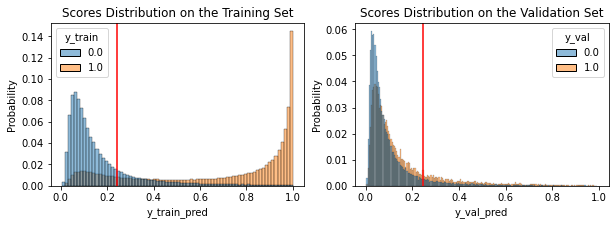

---------------------------------------------
Epoch: 07 | Time: 9m 35s
	 Train Loss: 0.366
	 Val. Loss: 0.655
	 ROC-AUC: 0.626
	 PR-AUC: 0.336
	 Recall for 0.4 precision: 0.173
	 Best Val. Loss: 0.554
	 Best ROC-AUC: 0.632
	 Best PR-AUC: 0.349
	 Best Recall for 0.4 precision: 0.236
---------------------------------------------


Within epoch loss (validation) 0.59292: 100%|██████████| 416/416 [00:41<00:00,  9.94it/s]


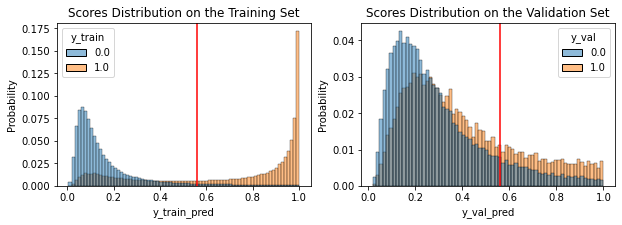

New best val_rocauc loss was found, current best val_recall_for_precision is 0.24078
---------------------------------------------
Epoch: 08 | Time: 10m 28s
	 Train Loss: 0.360
	 Val. Loss: 0.593
	 ROC-AUC: 0.637
	 PR-AUC: 0.355
	 Recall for 0.4 precision: 0.241
	 Best Val. Loss: 0.554
	 Best ROC-AUC: 0.637
	 Best PR-AUC: 0.355
	 Best Recall for 0.4 precision: 0.241
---------------------------------------------


Within epoch loss (validation) 0.57385: 100%|██████████| 416/416 [00:20<00:00, 20.74it/s]


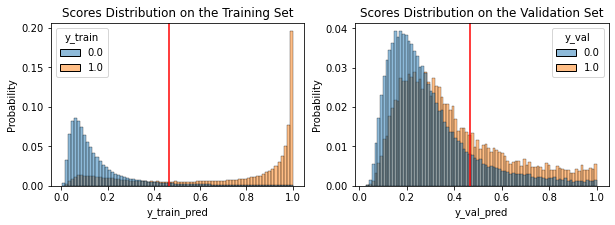

New best val_rocauc loss was found, current best val_recall_for_precision is 0.29158
---------------------------------------------
Epoch: 09 | Time: 10m 8s
	 Train Loss: 0.355
	 Val. Loss: 0.574
	 ROC-AUC: 0.647
	 PR-AUC: 0.362
	 Recall for 0.4 precision: 0.292
	 Best Val. Loss: 0.554
	 Best ROC-AUC: 0.647
	 Best PR-AUC: 0.362
	 Best Recall for 0.4 precision: 0.292
---------------------------------------------


Within epoch loss (training) 0.35192:   5%|▍         | 185/3982 [00:21<07:23,  8.56it/s]


KeyboardInterrupt: 

In [2]:
config = {
    
    # general
    'seed': 123,
    'metadata_file_path': './data/combined_data/metadata_balanced_by_death.csv',
    'data_folder_path': './data/individual-signals/',
    
    # training
    'batch_size': 128,
    'n_epochs': 10,
    'weight_decay': 0.7,
    'lr': 0.0005,
    'eval_metric':'recall_for_precision',

    # architecture
    'targets': ['AF'],
    'dropout': 0.1,
    'clip': 1,
    'scale':1,
    'depth': 3,
    
    # misc
    'model_saving_path': './models/inception-v0-AF-d',
    'verbosity':True
}

# run
print('Starting Experiment')
trainer(**config)

Starting Experiment


training using device: cuda


The model has 93,542,411 trainable parameters
DownstreamInceptionResnet(
  (layers): ModuleDict(
    (input): DownstreamInceptionResnetBlock(
      (conv1): ConvBlock(
        (conv): Conv1d(12, 64, kernel_size=(7,), stride=(2,), padding=(3,))
        (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (conv2): ConvBlock(
        (conv): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
        (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (inception3a): InceptionBlock(
        (branch1): ConvBlock(
          (conv): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
          (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (branch2): Sequential(
          (0): ConvBlock(
         

Within epoch loss (validation) 0.53921: 100%|██████████| 416/416 [00:59<00:00,  6.95it/s]


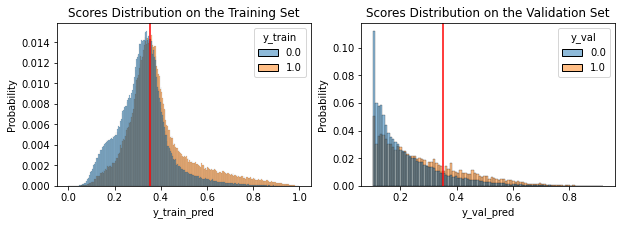

New best val_rocauc loss was found, current best val_recall_for_precision is 0.27295
---------------------------------------------
Epoch: 01 | Time: 11m 36s
	 Train Loss: 0.612
	 Val. Loss: 0.539
	 ROC-AUC: 0.631
	 PR-AUC: 0.352
	 Recall for 0.4 precision: 0.273
	 Best Val. Loss: 0.539
	 Best ROC-AUC: 0.631
	 Best PR-AUC: 0.352
	 Best Recall for 0.4 precision: 0.273
---------------------------------------------


Within epoch loss (validation) 0.6109: 100%|██████████| 416/416 [01:02<00:00,  6.71it/s] 


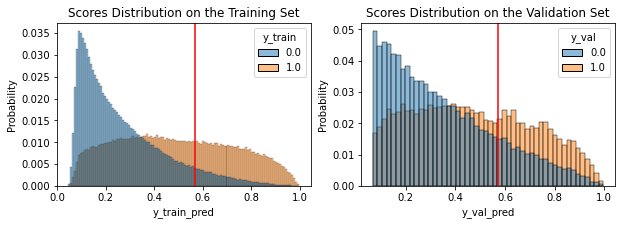

New best val_rocauc loss was found, current best val_recall_for_precision is 0.36279
---------------------------------------------
Epoch: 02 | Time: 12m 38s
	 Train Loss: 0.530
	 Val. Loss: 0.611
	 ROC-AUC: 0.651
	 PR-AUC: 0.370
	 Recall for 0.4 precision: 0.363
	 Best Val. Loss: 0.539
	 Best ROC-AUC: 0.651
	 Best PR-AUC: 0.370
	 Best Recall for 0.4 precision: 0.363
---------------------------------------------


Within epoch loss (validation) 0.55552: 100%|██████████| 416/416 [01:01<00:00,  6.75it/s]


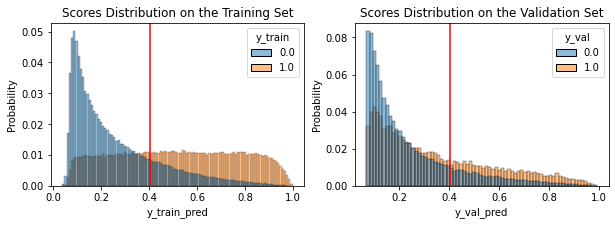

---------------------------------------------
Epoch: 03 | Time: 12m 7s
	 Train Loss: 0.507
	 Val. Loss: 0.556
	 ROC-AUC: 0.649
	 PR-AUC: 0.375
	 Recall for 0.4 precision: 0.346
	 Best Val. Loss: 0.539
	 Best ROC-AUC: 0.651
	 Best PR-AUC: 0.375
	 Best Recall for 0.4 precision: 0.363
---------------------------------------------


Within epoch loss (validation) 0.59751: 100%|██████████| 416/416 [01:03<00:00,  6.54it/s]


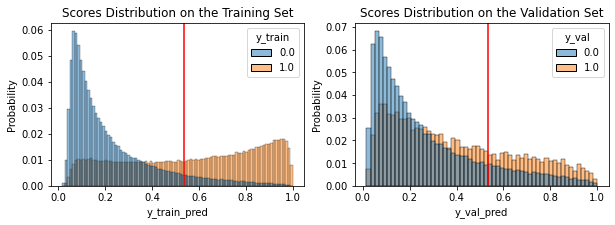

---------------------------------------------
Epoch: 04 | Time: 12m 21s
	 Train Loss: 0.460
	 Val. Loss: 0.598
	 ROC-AUC: 0.649
	 PR-AUC: 0.360
	 Recall for 0.4 precision: 0.292
	 Best Val. Loss: 0.539
	 Best ROC-AUC: 0.651
	 Best PR-AUC: 0.375
	 Best Recall for 0.4 precision: 0.363
---------------------------------------------


Within epoch loss (validation) 0.56299: 100%|██████████| 416/416 [01:03<00:00,  6.55it/s]


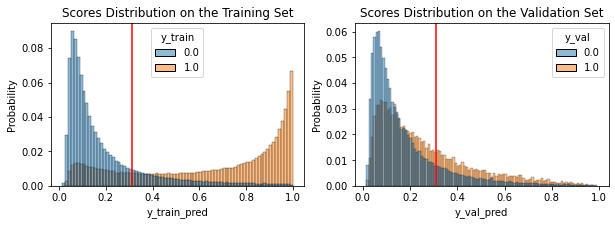

---------------------------------------------
Epoch: 05 | Time: 11m 51s
	 Train Loss: 0.397
	 Val. Loss: 0.563
	 ROC-AUC: 0.654
	 PR-AUC: 0.361
	 Recall for 0.4 precision: 0.314
	 Best Val. Loss: 0.539
	 Best ROC-AUC: 0.654
	 Best PR-AUC: 0.375
	 Best Recall for 0.4 precision: 0.363
---------------------------------------------


Within epoch loss (validation) 0.63991: 100%|██████████| 416/416 [01:31<00:00,  4.55it/s]


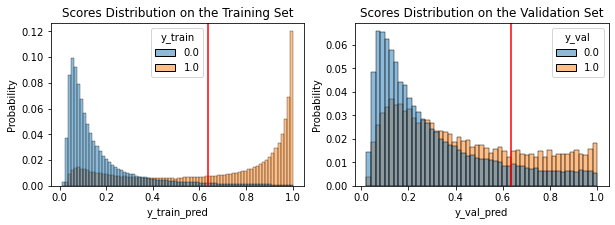

---------------------------------------------
Epoch: 06 | Time: 12m 41s
	 Train Loss: 0.374
	 Val. Loss: 0.640
	 ROC-AUC: 0.648
	 PR-AUC: 0.356
	 Recall for 0.4 precision: 0.268
	 Best Val. Loss: 0.539
	 Best ROC-AUC: 0.654
	 Best PR-AUC: 0.375
	 Best Recall for 0.4 precision: 0.363
---------------------------------------------


Within epoch loss (training) 0.36311:  24%|██▍       | 952/3982 [02:34<08:10,  6.18it/s]

In [3]:
config = {
    
    # general
    'seed': 123,
    'metadata_file_path': './data/combined_data/metadata_balanced_by_death.csv',
    'data_folder_path': './data/individual-signals/',
    
    # training
    'batch_size': 128,
    'n_epochs': 10,
    'weight_decay': 0.7,
    'lr': 0.0005,
    'eval_metric':'recall_for_precision',

    # architecture
    'targets': ['AF'],
    'dropout': 0.1,
    'clip': 1,
    'scale':1,
    'depth': 3,
    
    # misc
    'model_saving_path': './models/inception-v0-AF-d',
    'verbosity':True
}

# run
print('Starting Experiment')
trainer(**config)


In [ ]:
import sys
sys.exit(0)

Starting Experiment


training using device: cuda


The model has 6,804,601 trainable parameters
DownstreamInception(
  (conv1): ConvBlock(
    (conv): Conv1d(12, 64, kernel_size=(7,), stride=(2,), padding=(3,))
    (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): ConvBlock(
    (conv): Conv1d(64, 640, kernel_size=(3,), stride=(1,), padding=(1,))
    (bn): BatchNorm1d(640, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (inception3a): InceptionBlock(
    (branch1): ConvBlock(
      (conv): Conv1d(640, 320, kernel_size=(1,), stride=(1,))
      (bn): BatchNorm1d(320, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch2): Sequential(
      (0): ConvBlock(
        (conv): Conv1d(640, 96, kernel_size=(1,), stride=(1,))
        (bn): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_st

Within epoch loss (validation) 0.57606: 100%|██████████| 416/416 [01:07<00:00,  6.16it/s]


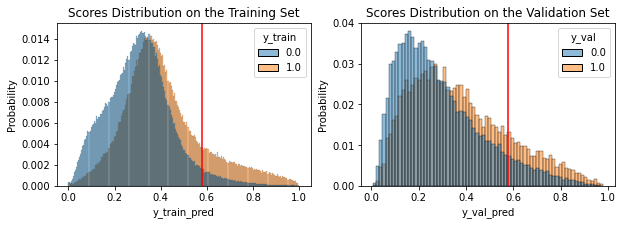

New best val_rocauc loss was found, current best val_recall_for_precision is 0.17722
---------------------------------------------
Epoch: 01 | Time: 12m 40s
	 Train Loss: 0.599
	 Val. Loss: 0.576
	 ROC-AUC: 0.623
	 PR-AUC: 0.341
	 PR-AUC: 0.177
	 Best Val. Loss: 0.576
	 Best ROC-AUC: 0.623
	 Best PR-AUC: 0.341
	 Best Recall for 0.4 precision: 0.177
---------------------------------------------


Within epoch loss (validation) 0.60175: 100%|██████████| 416/416 [01:09<00:00,  5.94it/s]


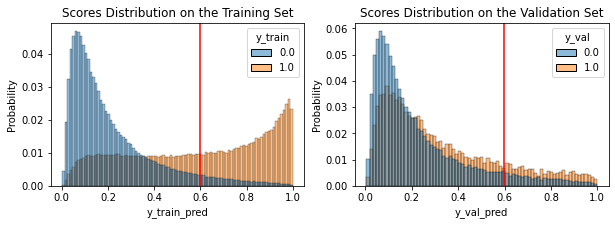

---------------------------------------------
Epoch: 02 | Time: 13m 17s
	 Train Loss: 0.445
	 Val. Loss: 0.602
	 ROC-AUC: 0.626
	 PR-AUC: 0.340
	 PR-AUC: 0.161
	 Best Val. Loss: 0.576
	 Best ROC-AUC: 0.626
	 Best PR-AUC: 0.341
	 Best Recall for 0.4 precision: 0.177
---------------------------------------------


Within epoch loss (validation) 0.601: 100%|██████████| 416/416 [01:09<00:00,  5.98it/s]  


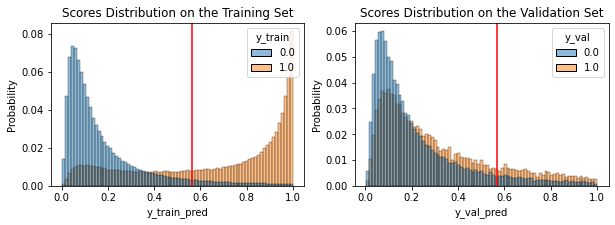

---------------------------------------------
Epoch: 03 | Time: 12m 58s
	 Train Loss: 0.389
	 Val. Loss: 0.601
	 ROC-AUC: 0.627
	 PR-AUC: 0.338
	 PR-AUC: 0.169
	 Best Val. Loss: 0.576
	 Best ROC-AUC: 0.627
	 Best PR-AUC: 0.341
	 Best Recall for 0.4 precision: 0.177
---------------------------------------------


Within epoch loss (validation) 0.61336: 100%|██████████| 416/416 [01:11<00:00,  5.84it/s]


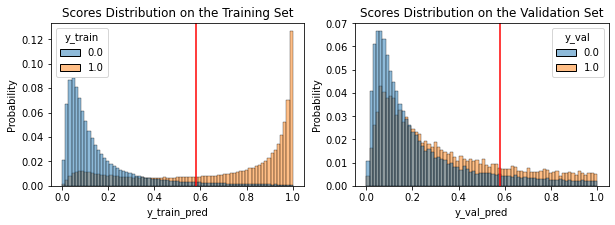

New best val_rocauc loss was found, current best val_recall_for_precision is 0.18866
---------------------------------------------
Epoch: 04 | Time: 13m 16s
	 Train Loss: 0.363
	 Val. Loss: 0.613
	 ROC-AUC: 0.636
	 PR-AUC: 0.345
	 PR-AUC: 0.189
	 Best Val. Loss: 0.576
	 Best ROC-AUC: 0.636
	 Best PR-AUC: 0.345
	 Best Recall for 0.4 precision: 0.189
---------------------------------------------


Within epoch loss (validation) 0.61153: 100%|██████████| 416/416 [01:11<00:00,  5.78it/s]


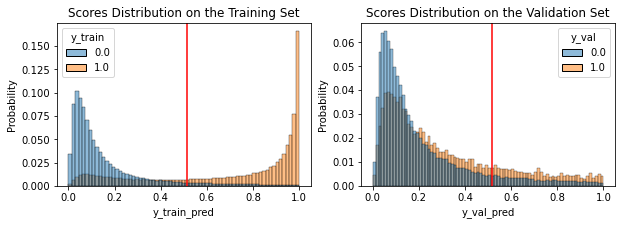

New best val_rocauc loss was found, current best val_recall_for_precision is 0.20119
---------------------------------------------
Epoch: 05 | Time: 12m 59s
	 Train Loss: 0.347
	 Val. Loss: 0.612
	 ROC-AUC: 0.631
	 PR-AUC: 0.343
	 PR-AUC: 0.201
	 Best Val. Loss: 0.576
	 Best ROC-AUC: 0.636
	 Best PR-AUC: 0.345
	 Best Recall for 0.4 precision: 0.201
---------------------------------------------


(0.3445125262123282, 0)

In [ ]:
config = {
    
    # general
    'seed': 123,
    'metadata_file_path': './data/combined_data/metadata_balanced_by_death.csv',
    'data_folder_path': './data/individual-signals/',
    
    # training
    'batch_size': 128,
    'n_epochs': 5,
    'weight_decay': 0.1,
    'lr': 0.0005,
    'eval_metric':'recall_for_precision',

    # architecture
    'targets': ['AF'],
    'dropout': 0.5,
    'clip': 1,
    'scale':5,
    
    # misc
    'model_saving_path': './models/inception-v0-AF',
    'verbosity':True
}

# run
print('Starting Experiment')
trainer(**config)


## Summary

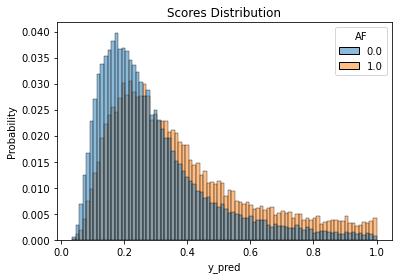

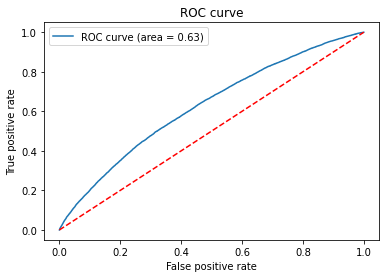

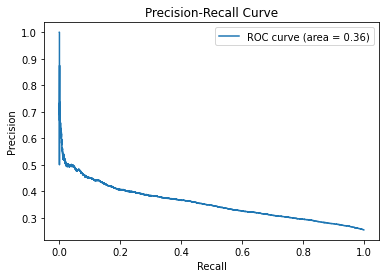

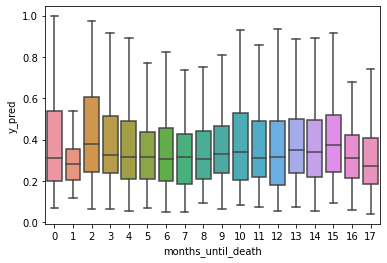

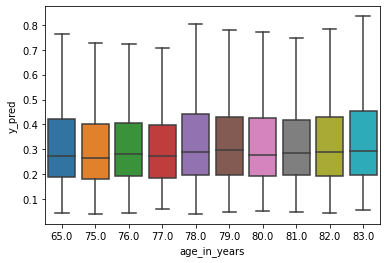

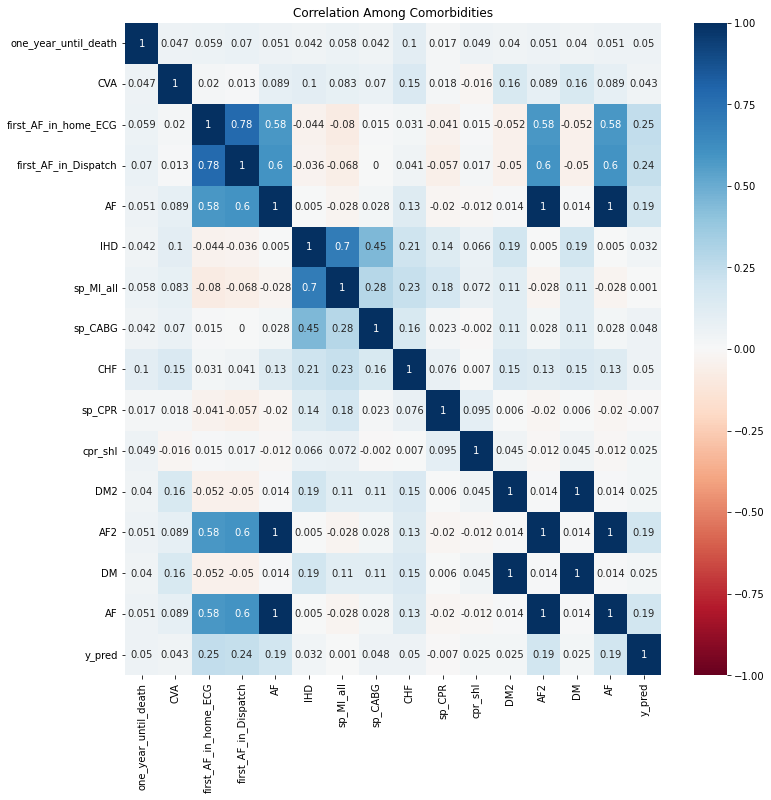

In [5]:
from utils.plots import *

# load model
if config['depth']==1:
    model = DownstreamInception(config['dropout'], scale=config['scale'])
else:
    model = DownstreamInceptionResnet(dropout=config['dropout'], scale=config['scale'], depth=config['depth'])
    
model.load_state_dict(torch.load('./models/inception-v0-AF-d/epoch_8_val_recall_for_precision.pt'))

# load data
data = pd.read_csv('./data/combined_data/metadata_only_existant_readings_09042023.csv',index_col=0)
data = data[data['sample'] == 'test'].reset_index(drop=True)
predictions, nonmissing_leads = predict(data['reading'], model, data)

data['y_pred'] = predictions
post_reg_analysis(data, 'AF', 'y_pred')

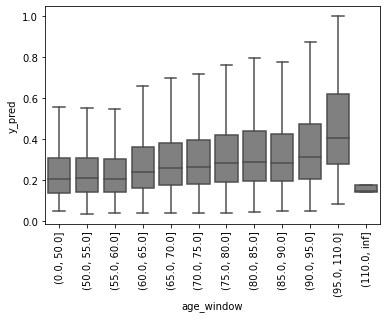

In [6]:
data['age_window'] = pd.cut(data['age_in_years'], bins = [0,50,55,60,65,70,75,80,85,90,95,110,np.inf])
data['age_window'].value_counts()

sns.boxplot(data = data, y = 'y_pred', x = 'age_window',showfliers = False, color='grey')
plt.xticks(rotation = 90)
plt.show()


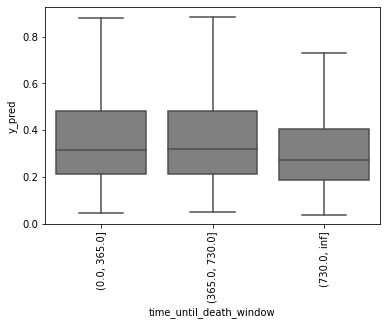

In [7]:
data['time_until_death_window'] = pd.cut(data['days_until_approximate_death'], bins=[0,365,730,np.inf])
sns.boxplot(data = data, y = 'y_pred', x = 'time_until_death_window',showfliers = False, color='grey')
plt.xticks(rotation = 90)
plt.show()

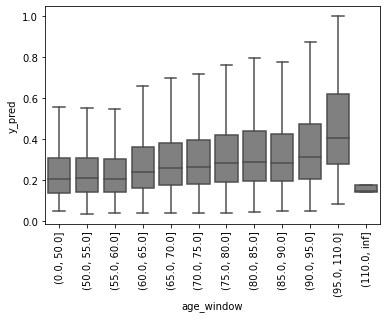

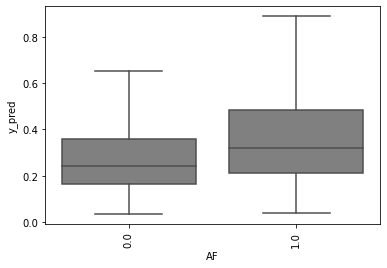

,y_pred,AF,age_in_years
y_pred,1.000000,0.190662,0.165994
AF,0.190662,1.000000,0.247804
age_in_years,0.165994,0.247804,1.000000


In [8]:
# Average Scores per age window
data['age_window'] = pd.cut(data['age_in_years'], bins = [0,50,55,60,65,70,75,80,85,90,95,110,np.inf])
sns.boxplot(data = data, y = 'y_pred', x = 'age_window',showfliers = False, color='grey')
plt.xticks(rotation = 90)
plt.show()

# Scores averages per time-until-death
data['time_until_death_window'] = pd.cut(data['days_until_approximate_death'], bins=[0,20,100,250,500,1000,2000,3000,4000,np.inf])
sns.boxplot(data = data, y = 'y_pred', x = 'time_until_death_window',showfliers = False, color='grey')
plt.xticks(rotation = 90)
plt.show()

# By target
sns.boxplot(data = data, y = 'y_pred', x = target,showfliers = False, color='grey')
plt.xticks(rotation = 90)
plt.show()

# Scores per age wrt target
sns.boxplot(data = data, y = 'y_pred', x = 'age_window',showfliers = False, color='grey', hue = target)
plt.xticks(rotation = 90)
plt.show()



# AF

Starting Experiment


training using device: cuda




Within epoch loss (validation) 0.60475: 100%|██████████| 416/416 [00:58<00:00,  7.10it/s]


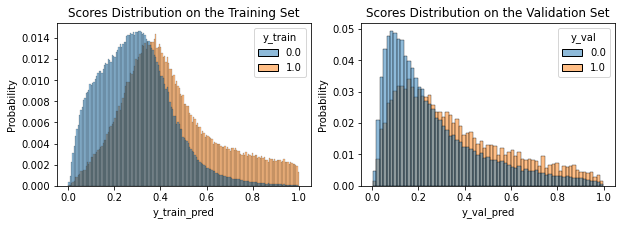

New best validation loss was found, current best valid loss is 0.60475
---------------------------------------------
Epoch: 01 | Time: 7m 25s
	 Train Loss: 0.572
	 Val. Loss: 0.605
	 ROC-AUC: 0.619
	 PR-AUC: 0.328
	 Best Val. Loss: 0.605
	 Best ROC-AUC: 0.619
	 Best PR-AUC: 0.328
---------------------------------------------


Within epoch loss (validation) 0.61024: 100%|██████████| 416/416 [00:13<00:00, 31.79it/s]


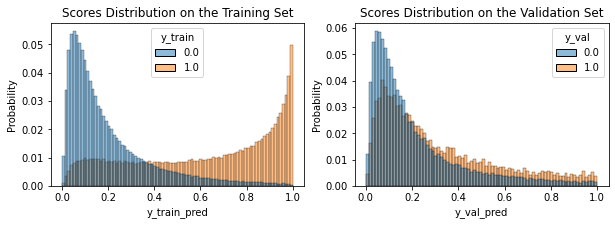

---------------------------------------------
Epoch: 02 | Time: 5m 47s
	 Train Loss: 0.420
	 Val. Loss: 0.610
	 ROC-AUC: 0.628
	 PR-AUC: 0.340
	 Best Val. Loss: 0.605
	 Best ROC-AUC: 0.628
	 Best PR-AUC: 0.340
---------------------------------------------


Within epoch loss (validation) 0.62267: 100%|██████████| 416/416 [00:13<00:00, 30.82it/s]


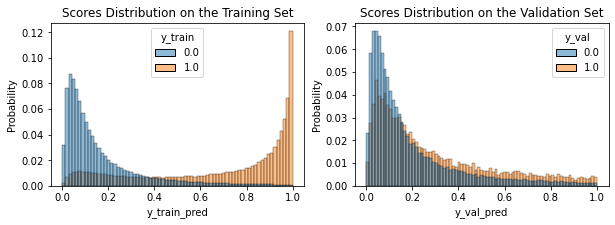

---------------------------------------------
Epoch: 03 | Time: 3m 24s
	 Train Loss: 0.365
	 Val. Loss: 0.623
	 ROC-AUC: 0.625
	 PR-AUC: 0.341
	 Best Val. Loss: 0.605
	 Best ROC-AUC: 0.628
	 Best PR-AUC: 0.341
---------------------------------------------


Within epoch loss (validation) 0.61749: 100%|██████████| 416/416 [00:57<00:00,  7.27it/s]


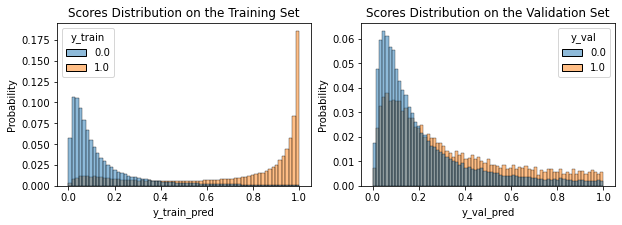

---------------------------------------------
Epoch: 04 | Time: 5m 9s
	 Train Loss: 0.335
	 Val. Loss: 0.617
	 ROC-AUC: 0.632
	 PR-AUC: 0.348
	 Best Val. Loss: 0.605
	 Best ROC-AUC: 0.632
	 Best PR-AUC: 0.348
---------------------------------------------


Within epoch loss (training) 0.3151:  91%|█████████ | 3612/3982 [05:34<00:34, 10.81it/s] 


KeyboardInterrupt: 

In [ ]:
config = {
    
    # general
    'seed': 123,
    'metadata_file_path': './data/combined_data/metadata_balanced_by_death.csv',
    'data_folder_path': './data/individual-signals/',
    
    # training
    'batch_size': 128,
    'n_epochs': 5,
    'weight_decay': 0.0001,
    'lr': 0.0005,

    # architecture
    'targets': ['AF'],
    'dropout': 0.5,
    'clip': 1,
    
    # misc
    'model_saving_path': './models/3.0-inception-bs128-balanced',

}

# run
print('Starting Experiment')
trainer(**config)


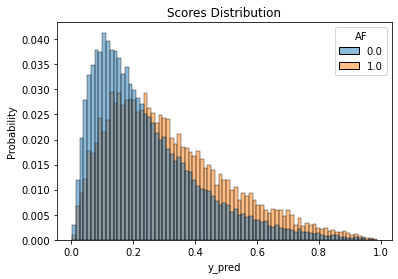

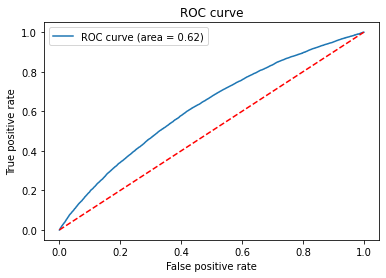

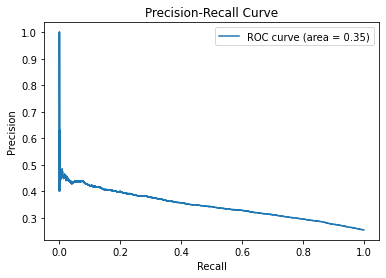

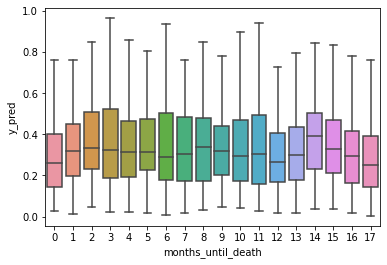

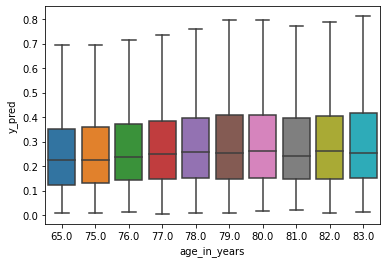

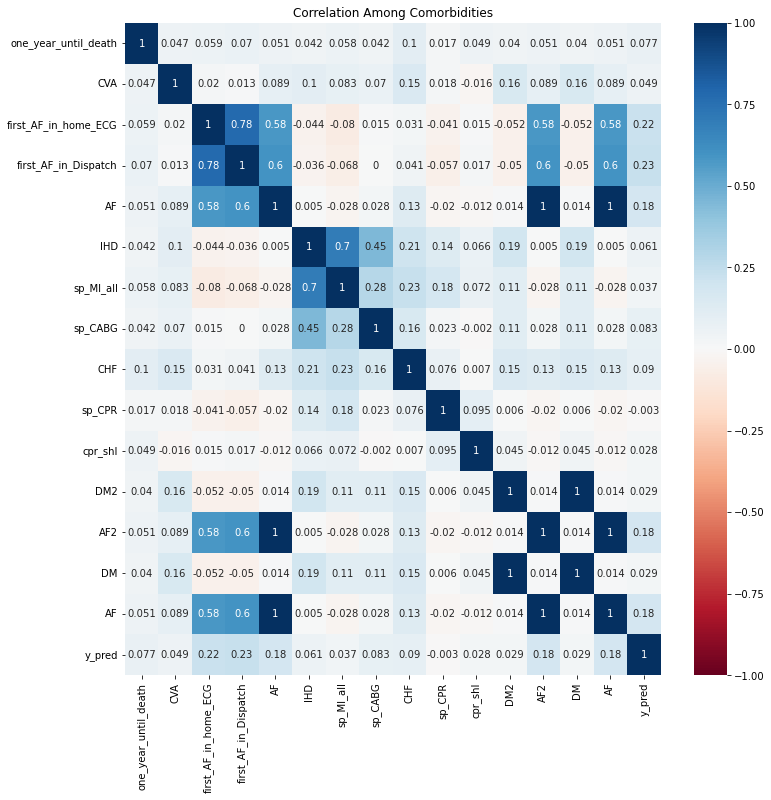

In [ ]:
from utils.plots import *

# load model
model = DownstreamInception(config['dropout'])
model.load_state_dict(torch.load('./models/3.0-inception-bs128-balanced-AF/epoch_0.pt'))

# load data
data = pd.read_csv('./data/combined_data/metadata_only_existant_readings_09042023.csv',index_col=0)
data = data[data['sample'] == 'test'].reset_index(drop=True)
predictions, nonmissing_leads = predict(data['reading'], model, data)

data['y_pred'] = predictions
post_reg_analysis(data, 'AF', 'y_pred')